**Cleaning data**

The happiness report dataset contains some additional characters next to the country names such as the "*" character. This will need to be removed.

There is also some null data that needs to be removed from this dataset.

In [96]:
import pandas as pd
happiness = pd.read_csv('./happiness.csv')

happiness = happiness.dropna()

for index, row in happiness.iterrows():
    happiness.at[index, 'Country'] = row['Country'].replace('*', '')
    
    # convert happiness score from string to integer
    happiness.at[index, 'Happiness score'] = int(row['Happiness score'].replace(',', ''))

happiness.to_csv("happiness_clean.csv", index=False)

**Joining the Happiness and Temperature Datasets**

Join our happiness and temperature datasets, removing any rows that are missing data.

In [48]:
import pandas as pd

happiness = pd.read_csv('./happiness_clean.csv')

temperature = pd.read_csv('./temperatures.csv')

result = pd.merge(temperature, happiness[['Country', 'RANK', 'Happiness score']], on='Country', how='outer')

# Remove any values where the country is not present in either dataset
result = result.dropna()

**Group Temperatures**

Grouping temperatures to find if there is any relation between temperature and happiness score. 

The happiest countries fall between 0-6 degrees celcius.

In [76]:
import numpy as np

average_temp = result.groupby(pd.cut(result['Temp(Celcius)'], np.arange(-6, 36, 6))).mean()

print(average_temp.sort_values(['Happiness score']))


               Temp(Celcius)       RANK  Happiness score
Temp(Celcius)                                           
(18, 24]           21.585938  94.937500      5009.187500
(12, 18]           15.253333  83.533333      5136.533333
(24, 30]           26.007317  85.121951      5302.121951
(-6, 0]            -3.716667  54.333333      6081.666667
(6, 12]             9.088571  48.457143      6166.000000
(0, 6]              3.260000  35.300000      6633.800000


**Graphing Happiness by Temperature**

There is a slight downward trend, as a countries temperature increases their happiness will tend to decrease.

[Text(0.5, 1.0, 'Happiness by Temperature')]

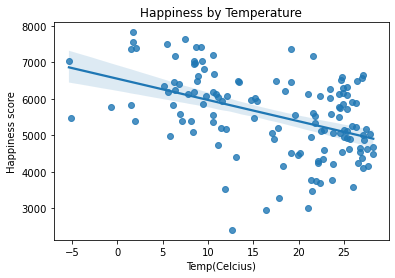

In [91]:
import seaborn as sns

sns.regplot(x=result['Temp(Celcius)'],y=result['Happiness score']).set(title='Happiness by Temperature')

**Joining the Happiness and Salary Datasets**

In [105]:
import pandas as pd

happiness = pd.read_csv('./happiness_clean.csv')

salaries = pd.read_csv('./salary.csv')

result = pd.merge(salaries, happiness[['Country', 'RANK', 'Happiness score']], on='Country', how='outer')

# Remove any values where the country is not present in either dataset
result = result.dropna()

**Graphing Happiness by Salary**



[Text(0.5, 1.0, 'Happiness by Salary')]

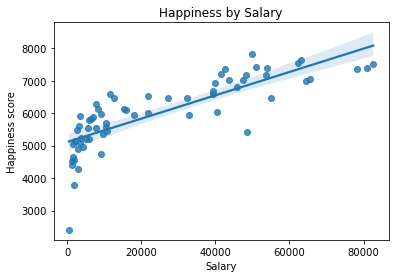

In [106]:
import seaborn as sns

sns.regplot(x=result['Salary'],y=result['Happiness score']).set(title='Happiness by Salary')